<a href="https://colab.research.google.com/github/p33ves/CMPT726-ML-Project/blob/main/Input_data_visualiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing input data

In [ ]:
import os, datetime, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install plotly==4.12.0
import plotly.express as px

     |████████████████████████████████| 13.1MB 325kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Visualizing portfolio data

In [ ]:
portfolio = pd.read_csv('https://raw.githubusercontent.com/p33ves/CMPT726-ML-Project/main/processed_datasets/cln_portfolio.csv')
offer_type_grp = portfolio.groupby('offer_type')
portfolio

,Unnamed: 0,reward,difficulty,offer_type,offer_id,email,mobile,social,web,duration
0,0,10,10,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,168
1,1,10,10,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,120
2,2,0,0,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,96
3,3,5,5,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,168
4,4,5,20,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,240
5,5,3,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,168
6,6,2,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,240
7,7,0,0,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,72
8,8,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,120
9,9,2,10,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,168


### View count of various offer types

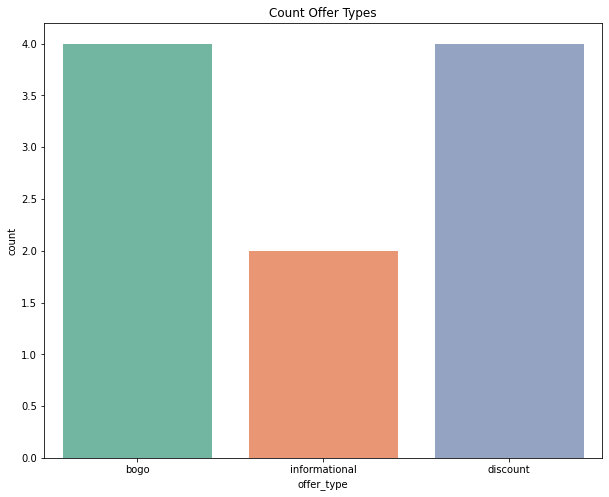

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Count Offer Types")
sns.countplot(x = portfolio['offer_type'], palette = "Set2")

We see equal number of 'bogo' and 'discount' offers and half the number of informational type

### View offer types based on Duration

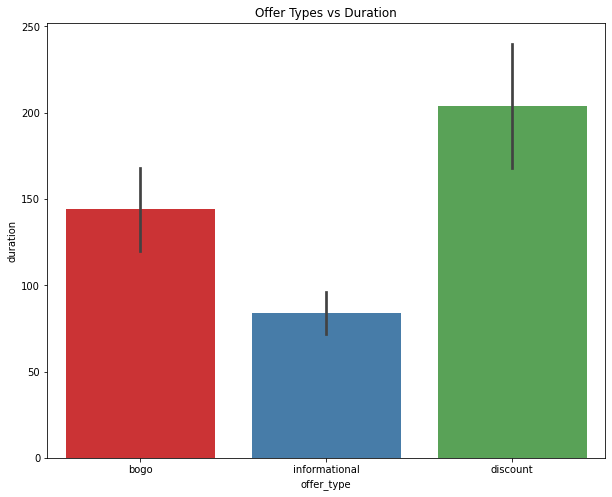

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Offer Types vs Duration")
sns.barplot(x = portfolio['offer_type'], y = portfolio['duration'], palette="Set1")

The 'discount' type is offered for the maximum duration followed by 'bogo' and 'informational' types respectively.

### View Offer Types based on Reward

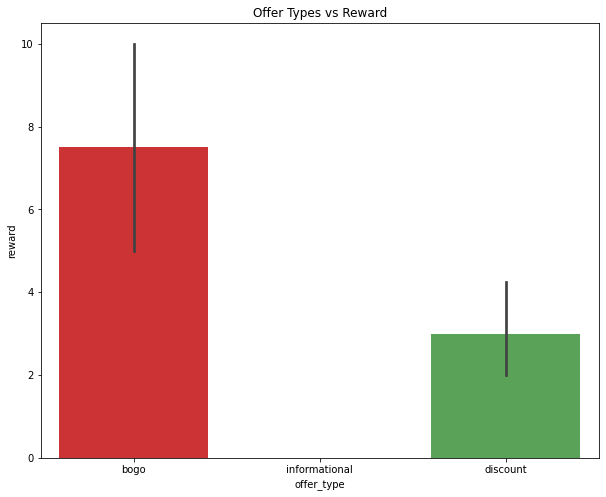

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Offer Types vs Reward")
sns.barplot(x = portfolio['offer_type'], y = portfolio['reward'], palette="Set1")

### View Offer Types based on Difficulty

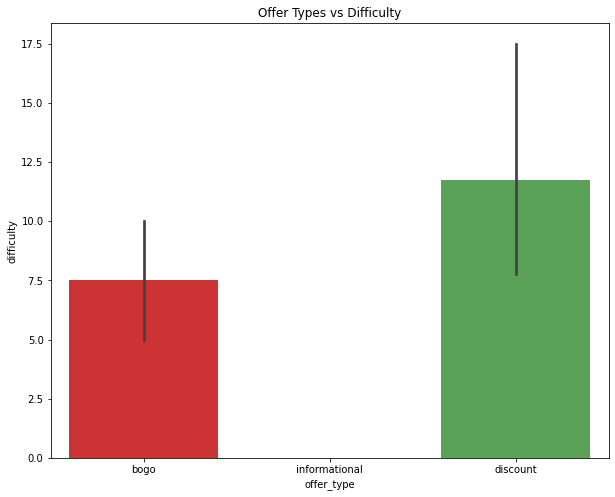

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Offer Types vs Difficulty")
sns.barplot(x = portfolio['offer_type'], y = portfolio['difficulty'], palette="Set1")

### View Offer Types Count based on Channels

In [ ]:
offer_type_sum = offer_type_grp['email','mobile','social','web'].agg('sum')
offer_type_sum.reset_index(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
offer_type_bar = px.bar(offer_type_sum, x='offer_type', y=['email', 'mobile', 'social', 'web'], barmode='group')
offer_type_bar.show()

### View offer channels data in heatmap

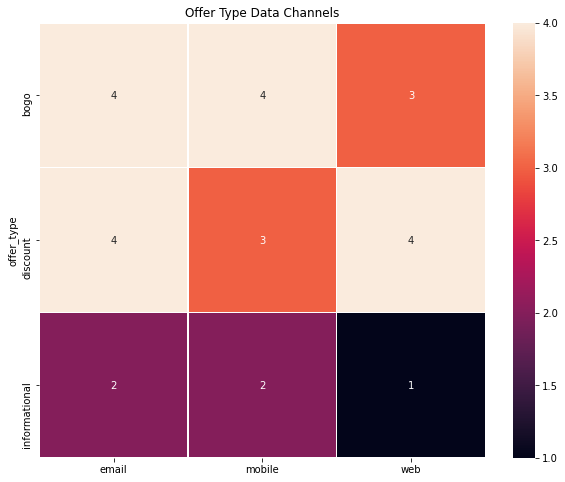

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Offer Type Data Channels")
offer_channels = offer_type_grp.sum()
sns.heatmap(data = offer_channels[['email','mobile','web']], annot=True, linewidths=.2)


### difficulty vs reward

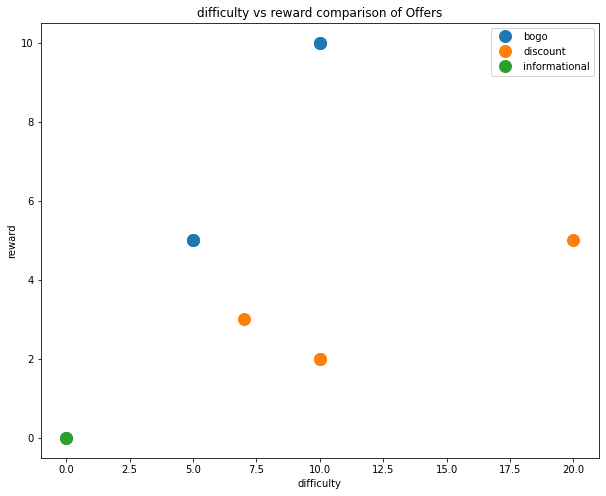

In [ ]:
size = (10, 8)
fig, ax = plt.subplots(figsize=size)
for off_typ, grp in offer_type_grp:
    ax.plot(grp['difficulty'], grp['reward'], marker='o', linestyle='', ms=12, label=off_typ)
ax.legend()
plt.title("difficulty vs reward comparison of Offers")
plt.xlabel('difficulty')
plt.ylabel('reward')
plt.show()

### duration vs reward

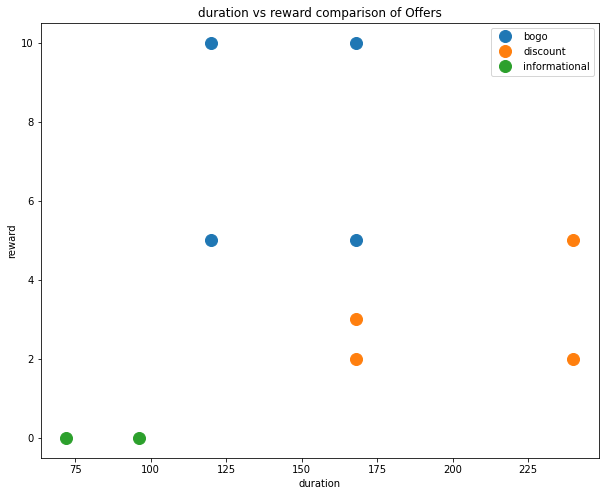

In [ ]:
size = (10, 8)
fig, ax = plt.subplots(figsize=size)
for off_typ, grp in offer_type_grp:
    ax.plot(grp['duration'], grp['reward'], marker='o', linestyle='', ms=12, label=off_typ)
ax.legend()
plt.title("duration vs reward comparison of Offers")
plt.xlabel('duration')
plt.ylabel('reward')
plt.show()

## Visualizing profile data

In [ ]:
profile = pd.read_csv('https://raw.githubusercontent.com/p33ves/CMPT726-ML-Project/main/processed_datasets/cln_profile.csv')
gender_grp = profile.groupby('gender')
profile.head()

,Unnamed: 0,gender,age,cust_id,became_member_on,income,days_as_member
0,1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1230
1,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,1297
2,5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,945
3,8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,1021
4,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,1111


### View Gender frequency

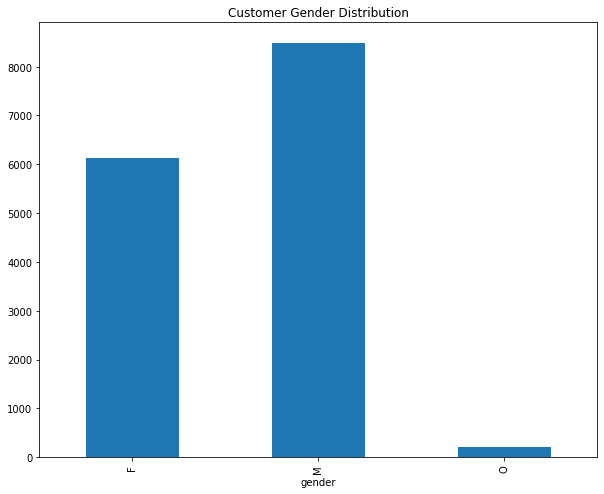

In [ ]:
size = (10, 8)
fig, ax = plt.subplots(figsize=size)
plt.title("Customer Gender Distribution")
profile.groupby('gender').size().plot(kind='bar')

### View Income variations

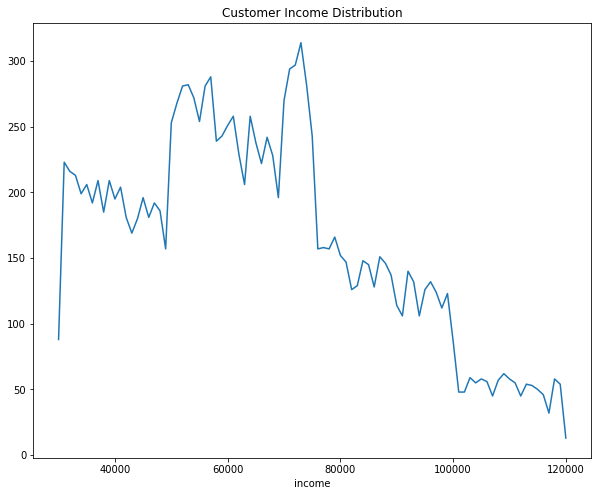

In [ ]:
size = (10, 8)
fig, ax = plt.subplots(figsize=size)
plt.title("Customer Income Distribution")
profile.groupby('income').size().plot()

### Plot Age Distribution

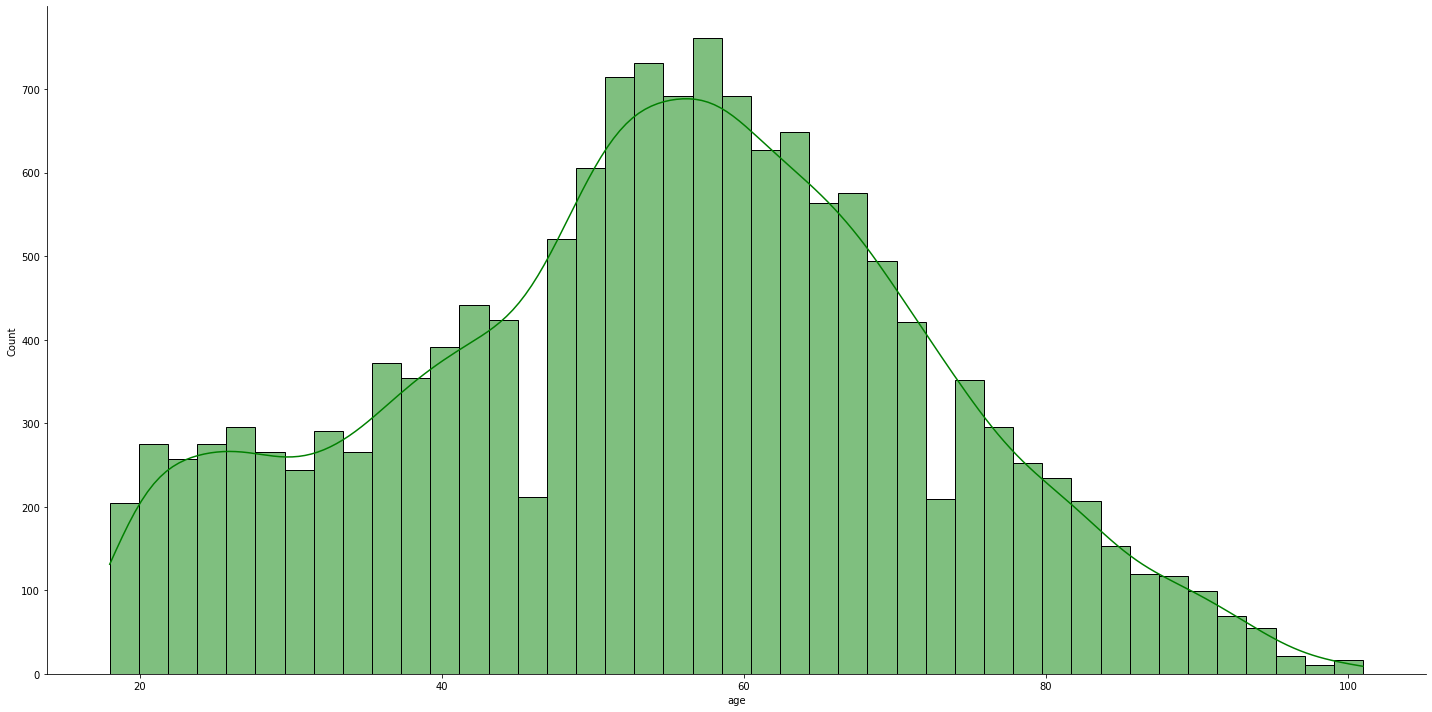

In [ ]:
sns.color_palette("flare", as_cmap=True)
sns.displot(data = profile['age'], height=10, aspect=2, color='g', kde=True)


### View distribution of Customer Gender vs Age

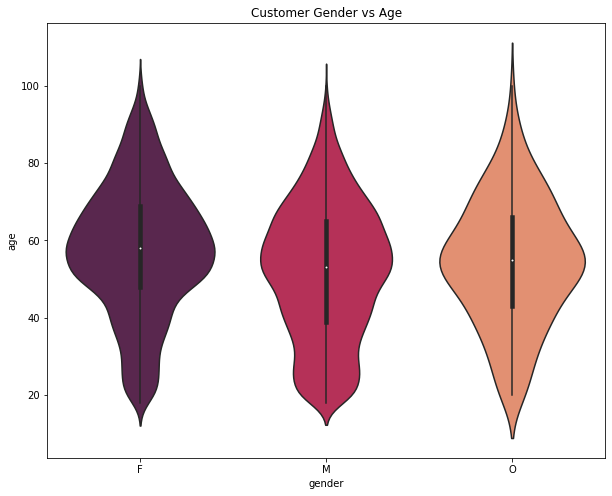

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Customer Gender vs Age")
sns.violinplot(x = profile['gender'], y = profile['age'], palette="rocket")

The distribution of gender over various age groups is even

### Plotting Age vs Income

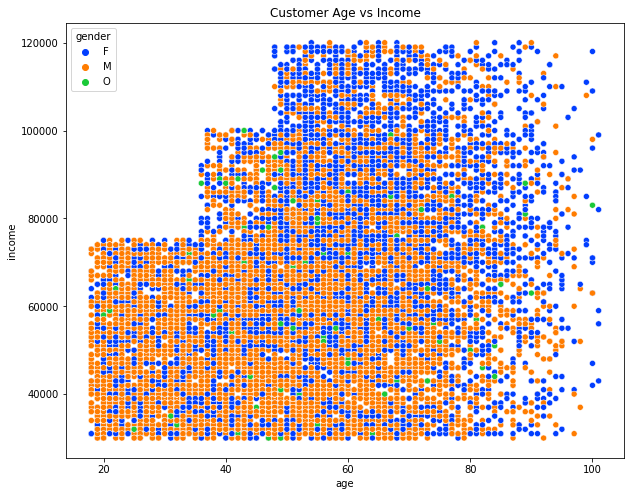

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Customer Age vs Income")
sns.scatterplot(data= profile, x = 'age', y = 'income', hue='gender', palette="bright")

There is correlation between age and income features

### Plotting Age vs Days as Member

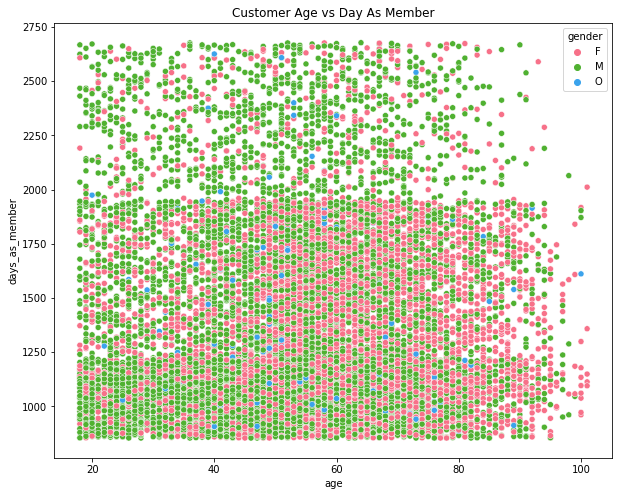

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Customer Age vs Day As Member")
sns.scatterplot(data= profile, x = 'age', y = 'days_as_member', hue='gender', palette="husl")

There is no significant correlation between the age and days as member and gender features

## Visualize Transcript Data

In [ ]:
transcript_data = pd.read_csv('https://raw.githubusercontent.com/p33ves/CMPT726-ML-Project/main/processed_datasets/cln_transcript.csv')
transcript_data

,Unnamed: 0,cust_id,event,hours_till_action,amount,reward,offer_id
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,1.59,NaN,NaN
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,9.53,NaN,NaN
306531,306531,a00058cf10334a308c68e7631c529907,transaction,714,3.61,NaN,NaN
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,3.53,NaN,NaN


### Visualizing count of types of events

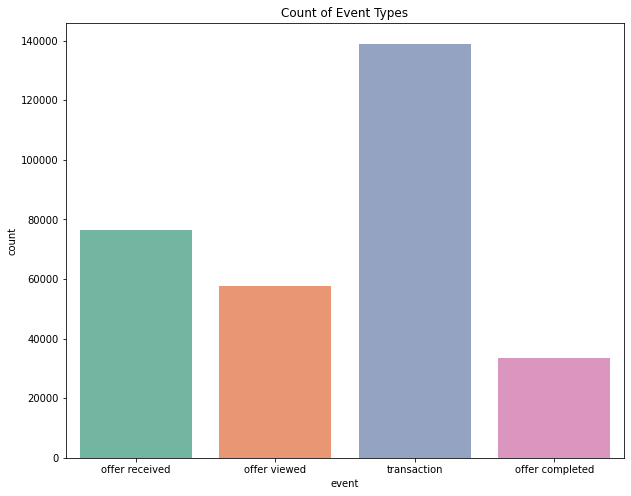

In [ ]:
 plt.figure(figsize=(10,8))
plt.title("Count of Event Types")
sns.countplot(x = transcript_data['event'], palette = "Set2")

## Visualize Extracted Data to determine Labels

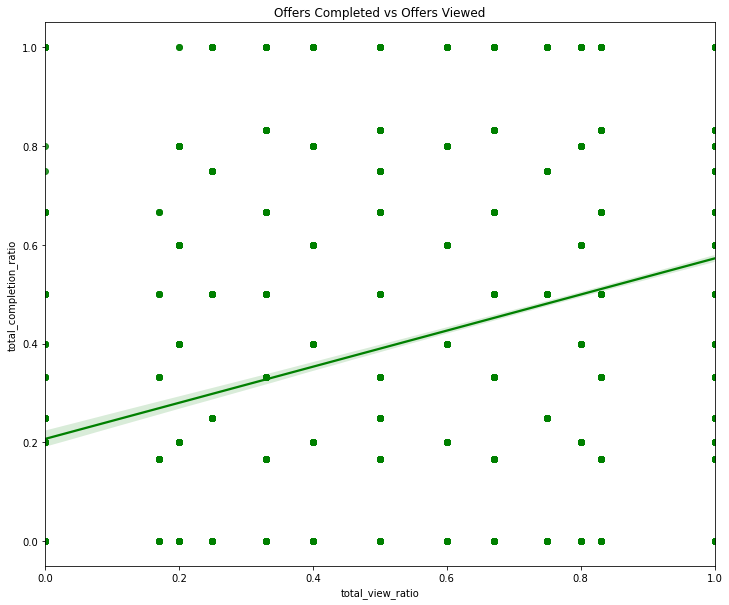

In [ ]:
xtr_data = pd.read_csv('https://raw.githubusercontent.com/p33ves/CMPT726-ML-Project/main/processed_datasets/xtr_profile.csv')
size = (12, 10)
fig, ax = plt.subplots(figsize=size)
plt.title("Offers Completed vs Offers Viewed")
sns.regplot(ax=ax, data=xtr_data, x='total_view_ratio', y='total_completion_ratio', color = 'g')
sns.set_style('whitegrid')

### Plots of Offers Completed and Offers Viewed

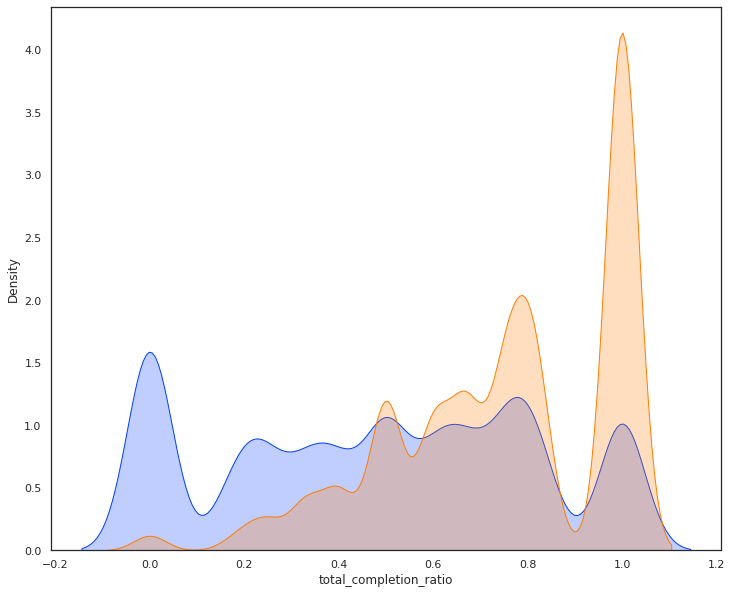

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="white", palette="bright", color_codes=True)
sns.kdeplot(data = xtr_data['total_completion_ratio'], shade=True, label = "Total Offers Completed")
sns.kdeplot(data = xtr_data['total_view_ratio'], shade=True, label = "Total Offers Viewed")

### Plotting Days as Member vs Offers Completion ratio

<Figure size 720x576 with 0 Axes>

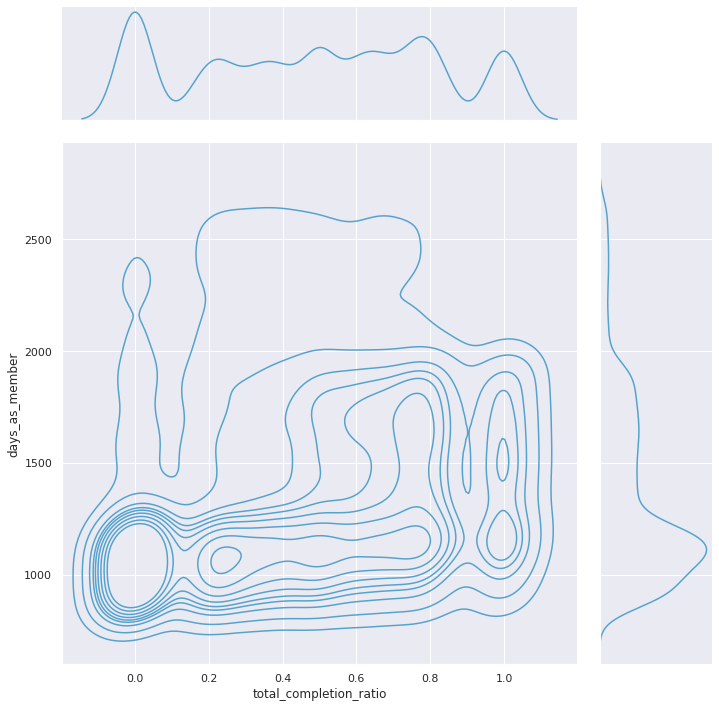

In [ ]:
plt.figure(figsize=(10,8))
sns.set(palette="icefire", color_codes=True)
sns.jointplot(data=xtr_data, y='days_as_member', x='total_completion_ratio',kind="kde", height=10, ratio=4)

### Plotting Days as Member vs OffersViewed ratio

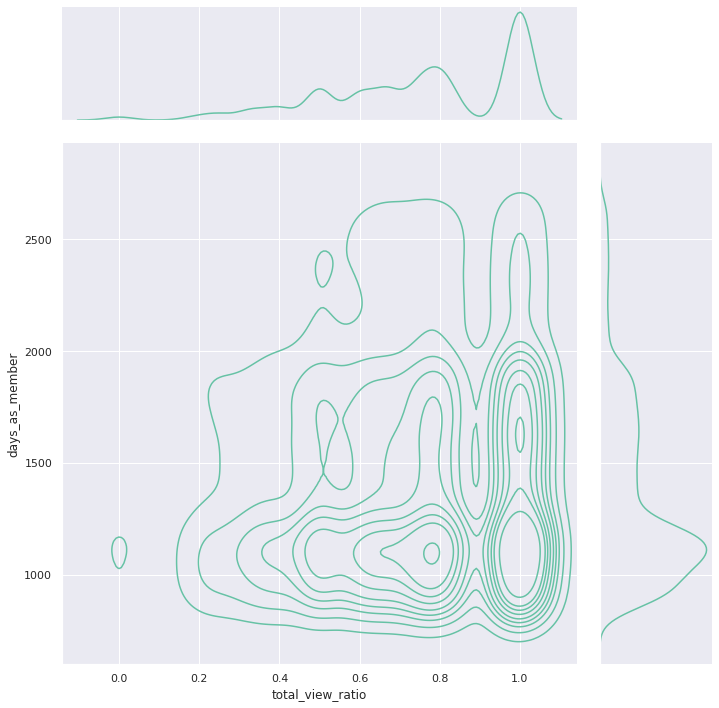

In [ ]:
sns.set(palette="Set2", color_codes=True)
sns.jointplot(data=xtr_data, y='days_as_member', x='total_view_ratio',kind="kde",  height=10, ratio=4)

People who are new to Starbucks have viewed a lot of offers and completed very less. Older members have viewed and completed more offers